In [26]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [102]:
df_raw

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
0,MLP,MNIST,-,X,S/W,-,-,-,-,-,-,-,-,-,-,-,1,-,97.790001,0.000000
1,Resnet18,CIFAR10,-,X,S/W,-,-,-,-,-,-,-,-,-,-,-,1,-,93.070000,0.000000
2,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,1,92.808998,0.063849
3,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,10,92.717995,0.068928
4,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,default,default,default,25,10,100,90.811996,0.101521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,linear,default,default,25,10,100000000,10.000000,0.000000
2835,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,linear,default,default,25,10,1000000000,10.000000,0.004714
2836,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,linear,default,default,25,10,10000000000,10.001000,0.003162
2837,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,0,0,1,linear,default,default,25,10,1000000000000,10.001000,0.003162


In [103]:
pivot_index = list(df_raw.columns[0:17]) # inf_time 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index

['model',
 'dataset',
 'pruning',
 'retrain',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'Gmax',
 'Gmin',
 'G_ratio']

In [9]:
df_raw['drift_model'].unique()

array(['-', 'default', 0.1, 0.05, 0.01, 'log', 'GST225', 'linear'],
      dtype=object)

In [113]:
df = df_raw.copy()

In [118]:
# df = df[df['Gmax']=='default']
df = df[df['drift_model'] == 'log']
df = df[df['inf_time'] == 1]
df = df[df['pgm_noise_scale'] == 1]
df = df[df['GDC'] == 'off']
df = df[df['IOparameter'] == 'non-ideal']

In [116]:
df['drift_model'].unique()

array(['log', 0.01, 'GST225', 'linear', 0.1], dtype=object)

In [119]:
df

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
223,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,0,1000,10,1,91.692001,0.346596
236,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,0,100,10,1,91.389999,0.308185
249,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,0,25,10,1,91.306999,0.224452
262,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,0,10,10,1,91.514999,0.166883
275,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,5,200,10,1,91.641998,0.188786
288,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,5,20,10,1,90.695999,0.511928
301,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,5,5,10,1,85.943008,1.374417
314,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,5,2,10,1,37.375999,3.229496
327,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,10,100,10,1,91.365005,0.361394
340,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,20,50,10,1,90.059006,0.521249


In [120]:
df_new = df[df['pruning']=='-']

In [148]:
df_p = df[df['pruning']!='-']
df_p

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
1658,MLP,MNIST,0.3,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,95.889000,0.300388
1671,MLP,MNIST,0.4,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,94.520996,0.694270
1684,MLP,MNIST,0.5,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,93.931999,0.347526
1697,MLP,MNIST,0.6,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,93.182999,0.962855
1710,MLP,MNIST,0.7,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,93.977997,0.629000
1724,Resnet18,CIFAR10,0.3,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,91.219002,0.455933
1738,Resnet18,CIFAR10,0.4,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,90.636002,0.420798
1752,Resnet18,CIFAR10,0.5,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,89.258995,0.380014
1766,Resnet18,CIFAR10,0.6,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,81.991989,0.474127
1780,Resnet18,CIFAR10,0.7,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,47.004002,2.243718


In [121]:
df_resnet = df_new[df_new['model'] == 'Resnet18']
df_mlp = df_new[df_new['model'] == 'MLP']

In [122]:
df_resnet

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
223,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,0,1000,10,1,91.692001,0.346596
236,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,0,100,10,1,91.389999,0.308185
249,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,0,25,10,1,91.306999,0.224452
262,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,0,10,10,1,91.514999,0.166883
275,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,5,200,10,1,91.641998,0.188786
288,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,5,20,10,1,90.695999,0.511928
301,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,5,5,10,1,85.943008,1.374417
314,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,5,2,10,1,37.375999,3.229496
327,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,10,100,10,1,91.365005,0.361394
340,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,20,50,10,1,90.059006,0.521249


In [145]:
df_resnet = df_resnet.sort_values(by='G_ratio', ascending=True)
# df_resnet = df_resnet.drop(df_resnet.index[3], axis=0)
df_resnet

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
314,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,5,2,10,1,37.375999,3.229496
301,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,5,5,10,1,85.943008,1.374417
262,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,0,10,10,1,91.514999,0.166883
366,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,100,10,10,1,89.233009,0.871449
288,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,5,20,10,1,90.695999,0.511928
353,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,50,20,10,1,89.968994,0.751154
249,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,0,25,10,1,91.306999,0.224452
1445,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,91.673012,0.247523
340,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,20,50,10,1,90.059006,0.521249
236,Resnet18,CIFAR10,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,0,100,10,1,91.389999,0.308185


In [124]:
df_mlp

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
1003,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,0,1000,10,1,94.762001,0.835780
1016,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,0,100,10,1,94.391998,0.752592
1029,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,0,25,10,1,94.478996,0.889425
1042,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,0,10,10,1,95.235001,0.365460
1055,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,5,200,10,1,94.086006,0.629131
1068,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,5,20,10,1,91.163002,1.804475
1081,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,5,5,10,1,89.461998,2.442034
1094,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,5,2,10,1,57.979004,5.608686
1107,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,10,100,10,1,93.228996,0.761730
1120,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,20,50,10,1,92.612000,1.365429


In [125]:
df_mlp = df_mlp.sort_values(by='G_ratio', ascending=True)
df_mlp

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std
1094,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,5,2,10,1,57.979004,5.608686
1081,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,5,5,10,1,89.461998,2.442034
1042,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,10,0,10,10,1,95.235001,0.365460
1146,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,100,10,10,1,91.334999,1.785039
1068,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,5,20,10,1,91.163002,1.804475
1133,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,50,20,10,1,91.725006,1.269220
1029,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,25,0,25,10,1,94.478996,0.889425
1432,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,default,default,25,10,1,94.813004,0.670326
1120,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,1000,20,50,10,1,92.612000,1.365429
1016,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,1,1,log,100,0,100,10,1,94.391998,0.752592


In [193]:
df_mlp = df_mlp.drop(df_mlp.index[3], axis=0)
df_mlp

,model,dataset,device,IOparameter,GDC,pgm_noise_scale,read_noise_scale,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,Unnamed: 16,Unnamed: 17,Unnamed: 18
1094,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,10,5,2,10,1,57.979004,5.608686,NaN,NaN,NaN
1081,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,25,5,5,10,1,89.461998,2.442034,NaN,NaN,NaN
1146,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,100,10,10,1,91.334999,1.785039,NaN,NaN,NaN
1133,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,50,20,10,1,91.725006,1.269220,NaN,NaN,NaN
1120,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,20,50,10,1,92.612000,1.365429,NaN,NaN,NaN
1107,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,10,100,10,1,93.228996,0.761730,NaN,NaN,NaN
1055,MLP,MNIST,PCMPresetUnitCell,non-ideal,off,1,1,1,log,1000,5,200,10,1,94.086006,0.629131,NaN,NaN,NaN


In [134]:
# 같은 x값에 대해 y값 평균 계산
mlp_mean = df_mlp.groupby('G_ratio', as_index=False)['accuracy'].mean()
resnet_mean = df_resnet.groupby('G_ratio', as_index=False)['accuracy'].mean()
resnet_mean

,G_ratio,accuracy
0,2,37.375999
1,5,85.943008
2,10,90.374004
3,20,90.332496
4,25,91.490005
5,50,90.059006
6,100,91.377502
7,200,91.641998
8,1000,91.692001


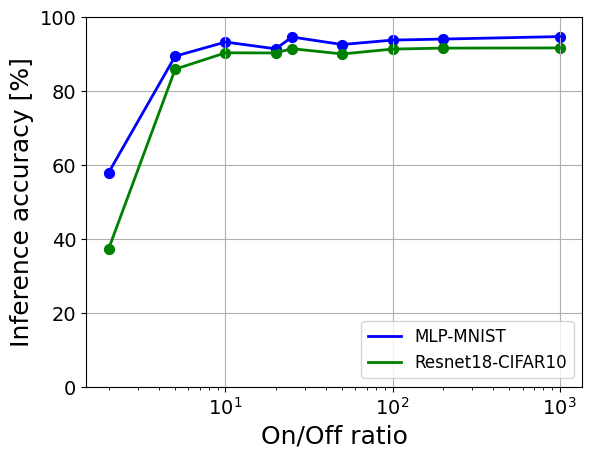

In [147]:
import matplotlib.pyplot as plt

x = df_mlp['G_ratio']
y = df_mlp['accuracy']
y_r = df_resnet['accuracy']

x_mean = mlp_mean['G_ratio']
y_mean = mlp_mean['accuracy']
y_r_mean = resnet_mean['accuracy']

plt.grid(True)

plt.plot(x_mean,y_mean, label = 'MLP-MNIST', linewidth=2, color='b')
plt.scatter(x_mean, y_mean, marker='.', s=200, color='b')

plt.plot(x_mean,y_r_mean, label = 'Resnet18-CIFAR10', linewidth=2, color='g')
plt.scatter(x_mean, y_r_mean, marker='.', s=200, color='g')


plt.legend(fontsize=12, loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.xlabel('On/Off ratio', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [138]:
# 같은 x값에 대해 y값 평균 계산
mlp_std = df_mlp.groupby('G_ratio', as_index=False)['std'].mean()
resnet_std = df_resnet.groupby('G_ratio', as_index=False)['std'].mean()

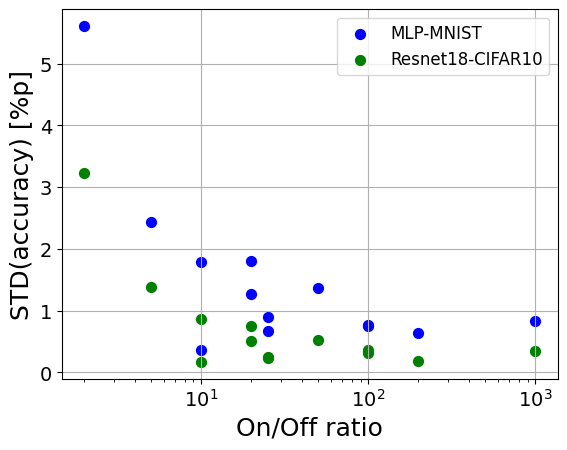

In [146]:
x = df_mlp['G_ratio']
y = df_mlp['std']
y_r = df_resnet['std']

x_mean = mlp_std['G_ratio']
y_mean = mlp_std['std']
y_r_mean = resnet_std['std']

plt.grid(True)

# plt.plot(x_mean,y_mean, linewidth=2, color='b')
plt.scatter(x, y, marker='.', s=200, color='b', label = 'MLP-MNIST')

# plt.plot(x_mean,y_r_mean, linewidth=2, color='g')
plt.scatter(x, y_r, marker='.', s=200, color='g', label='Resnet18-CIFAR10')


plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('On/Off ratio', fontsize=18)
plt.ylabel('STD(accuracy) [%p]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.ylim(0,100)
# plt.xlim(1,100000000)
plt.xscale('log')
plt.show()

In [27]:
df= df_raw.copy()

In [95]:
# df2 = df[df['Gmax']=='default']
# # df = df[df['drift_model'] == 'log']
# # df = df[df['inf_time'] == 1]
# df2 = df2[df2['pgm_noise_scale'] == 1]
# df2 = df2[df2['model'] == 'Resnet18']
# df2 = df2[df2['pruning'] == '-']

df3 = df[df['Gmax']=='default']
df3 = df3[df3['pgm_noise_scale'] == 0]
df3 = df3[df3['model'] == 'MLP']
df3 = df3[df3['pruning'] == '-']
df3 = df3[df3['IOparameter'] == 'ideal']

In [96]:
dfgdcx = df2[df2['GDC'] == 'off']
# dfgdcx
dfgdc = df2[df2['GDC'] == 'on']

dfgdcxM = df3[df3['GDC'] == 'off']
dfgdcM = df3[df3['GDC'] == 'on']

In [97]:
dfgdcM['drift_model'].unique()

array(['default', 'log', 'linear', 0.1, 0.05, 0.01], dtype=object)

In [31]:
pivot_index = list(df_raw.columns[0:18]) # inf_time 까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index

['model',
 'dataset',
 'pruning',
 'retrain',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'Gmax',
 'Gmin',
 'G_ratio',
 'inf_time']

In [99]:
dfgdcx_p = dfgdcx.pivot_table(index=pivot_index, columns='drift_model', values='accuracy', aggfunc='mean')

dfgdc_p = dfgdc.pivot_table(index=pivot_index, columns='drift_model', values='accuracy', aggfunc='mean')

dfgdcxM_p = dfgdcxM.pivot_table(index=pivot_index, columns='drift_model', values='accuracy', aggfunc='mean')

dfgdcM_p = dfgdcM.pivot_table(index=pivot_index, columns='drift_model', values='accuracy', aggfunc='mean')

# dfgdcxM_p

dfgdcx_p.reset_index(inplace=True) # index to columns
dfgdc_p.reset_index(inplace=True) # index to columns
dfgdcxM_p.reset_index(inplace=True) # index to columns
dfgdcM_p.reset_index(inplace=True) # index to columns

In [115]:
df_pivot.to_csv('./pivot.csv', index=False)

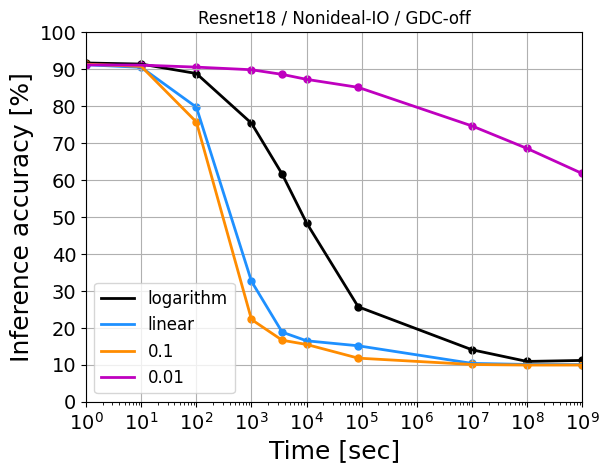

In [77]:
# GDC off

import matplotlib.pyplot as plt

x = dfgdcx_p['inf_time']

plt.grid(True)
plt.plot(x,dfgdcx_p['log'], label = 'logarithm', linewidth=2, color='k')
plt.scatter(x, dfgdcx_p['log'], marker='.', s=100, color='k')

plt.plot(x,dfgdcx_p['linear'], label = 'linear', linewidth=2, color='dodgerblue')
plt.scatter(x, dfgdcx_p['linear'], marker='.',  s=100, color='dodgerblue')

plt.plot(x,dfgdcx_p[0.1], label = '0.1', linewidth=2, color='darkorange')
plt.scatter(x, dfgdcx_p[0.1], marker='.',  s=100, color='darkorange')

# plt.plot(x,df_new[0.05], label = '0.05', linewidth=2, color='g')
# plt.scatter(x, df_new[0.05], marker='.',  s=100, color='g')

plt.plot(x,dfgdcx_p[0.01], label = '0.01', linewidth=2, color='m')
plt.scatter(x, dfgdcx_p[0.01], marker='.',  s=100, color='m')

# plt.plot(x,df_new['GST225'], label = '* GST225', linewidth=3, color='r')
# plt.scatter(x, df_new['GST225'], marker='.',  s=200, color='r')

plt.title('Resnet18 / Nonideal-IO / GDC-off')
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(range(0, 101, 10)) 

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

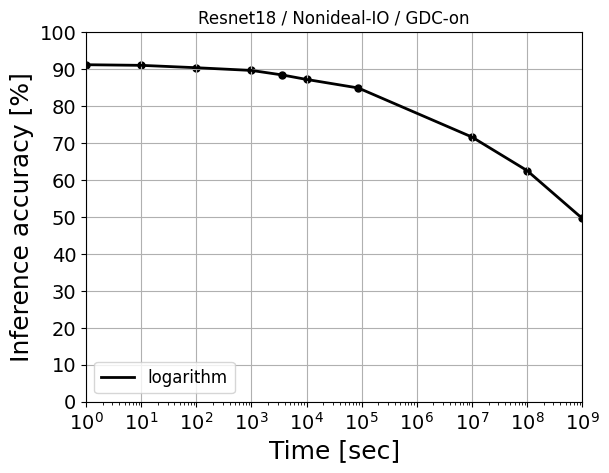

In [80]:
# GDC on

import matplotlib.pyplot as plt

x = dfgdc_p['inf_time']

plt.grid(True)
plt.plot(x,dfgdc_p['log'], label = 'logarithm', linewidth=2, color='k')
plt.scatter(x, dfgdc_p['log'], marker='.', s=100, color='k')

# plt.plot(x,dfgdc_p['linear'], label = 'linear', linewidth=2, color='dodgerblue')
# plt.scatter(x, dfgdc_p['linear'], marker='.',  s=100, color='dodgerblue')

# plt.plot(x,dfgdc_p[0.1], label = '0.1', linewidth=2, color='darkorange')
# plt.scatter(x, dfgdc_p[0.1], marker='.',  s=100, color='darkorange')

# plt.plot(x,dfgdc_p[0.01], label = '0.01', linewidth=2, color='m')
# plt.scatter(x, dfgdc_p[0.01], marker='.',  s=100, color='m')

# plt.plot(x,df_new['GST225'], label = '* GST225', linewidth=3, color='r')
# plt.scatter(x, df_new['GST225'], marker='.',  s=200, color='r')

plt.title('Resnet18 / Nonideal-IO / GDC-on')
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(range(0, 101, 10)) 

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

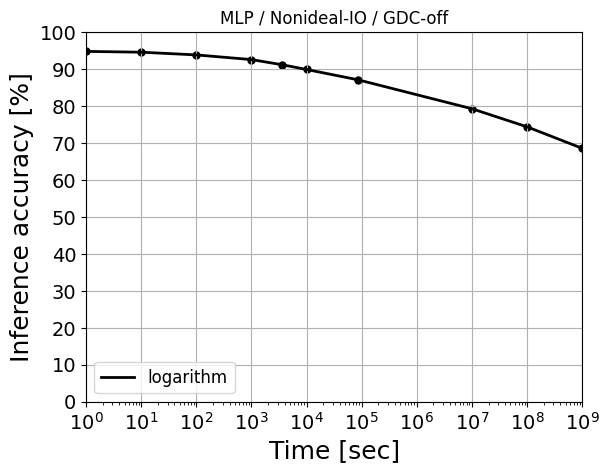

In [88]:
# GDC off - MLP

import matplotlib.pyplot as plt

x = dfgdcxM_p['inf_time']

plt.grid(True)
plt.plot(x,dfgdcxM_p['log'], label = 'logarithm', linewidth=2, color='k')
plt.scatter(x, dfgdcxM_p['log'], marker='.', s=100, color='k')

# plt.plot(x,dfgdcxM_p['linear'], label = 'linear', linewidth=2, color='dodgerblue')
# plt.scatter(x, dfgdcxM_p['linear'], marker='.',  s=100, color='dodgerblue')

# plt.plot(x,dfgdcxM_p[0.1], label = '0.1', linewidth=2, color='darkorange')
# plt.scatter(x, dfgdcxM_p[0.1], marker='.',  s=100, color='darkorange')

# plt.plot(x,dfgdcxM_p[0.01], label = '0.01', linewidth=2, color='m')
# plt.scatter(x, dfgdcxM_p[0.01], marker='.',  s=100, color='m')

# plt.plot(x,df_new['GST225'], label = '* GST225', linewidth=3, color='r')
# plt.scatter(x, df_new['GST225'], marker='.',  s=200, color='r')

plt.title('MLP / Nonideal-IO / GDC-off')
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(range(0, 101, 10)) 

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

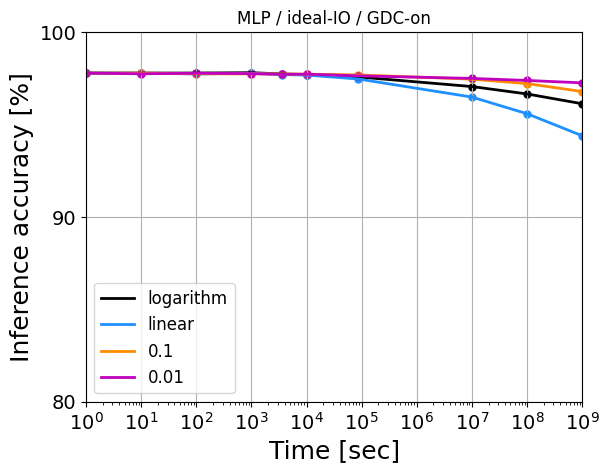

In [101]:
# GDC on - MLP

import matplotlib.pyplot as plt

x = dfgdcM_p['inf_time']

plt.grid(True)
plt.plot(x,dfgdcM_p['log'], label = 'logarithm', linewidth=2, color='k')
plt.scatter(x, dfgdcM_p['log'], marker='.', s=100, color='k')

plt.plot(x,dfgdcM_p['linear'], label = 'linear', linewidth=2, color='dodgerblue')
plt.scatter(x, dfgdcM_p['linear'], marker='.',  s=100, color='dodgerblue')

plt.plot(x,dfgdcM_p[0.1], label = '0.1', linewidth=2, color='darkorange')
plt.scatter(x, dfgdcM_p[0.1], marker='.',  s=100, color='darkorange')

plt.plot(x,dfgdcM_p[0.01], label = '0.01', linewidth=2, color='m')
plt.scatter(x, dfgdcM_p[0.01], marker='.',  s=100, color='m')

# plt.plot(x,df_new['GST225'], label = '* GST225', linewidth=3, color='r')
# plt.scatter(x, df_new['GST225'], marker='.',  s=200, color='r')

plt.title('MLP / ideal-IO / GDC-on')
plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]', fontsize=18)
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(range(0, 101, 10)) 

plt.ylim(80,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

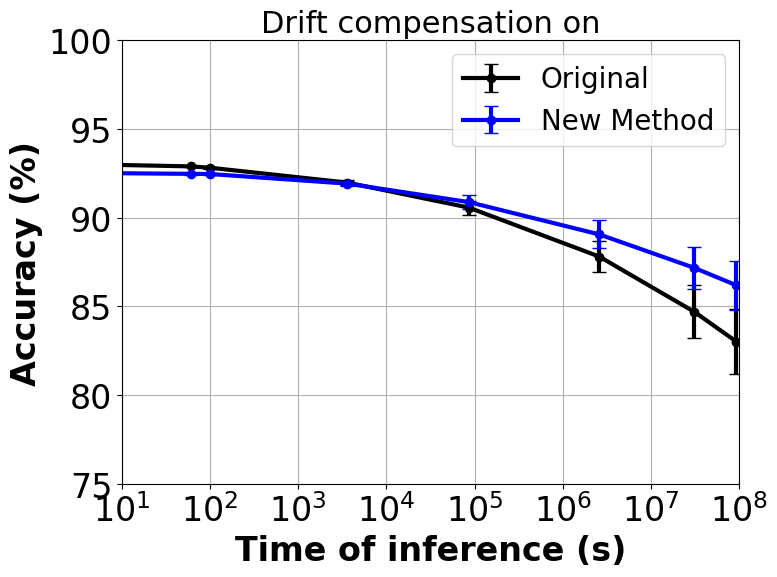

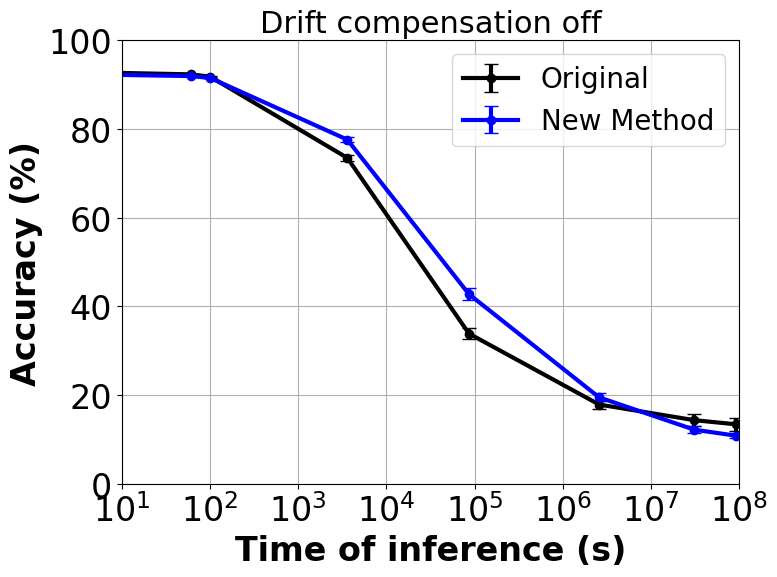

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 정의
data = {
    "model_type": ["vanilla"]*9 + ["0.6_retrained"]*9 + ["vanilla"]*9 + ["0.6_retrained"]*9,
    "GDC": ["on"]*18 + ["off"]*18,
    "inf_time": [
        1.00E+00, 6.00E+01, 1.00E+02, 3.60E+03, 8.64E+04, 2.59E+06, 3.11E+07, 9.33E+07, 1.00E+09,
        1.00E+00, 6.00E+01, 1.00E+02, 3.60E+03, 8.64E+04, 2.59E+06, 3.11E+07, 9.33E+07, 1.00E+09,
        1.00E+00, 6.00E+01, 1.00E+02, 3.60E+03, 8.64E+04, 2.59E+06, 3.11E+07, 9.33E+07, 1.00E+09,
        1.00E+00, 6.00E+01, 1.00E+02, 3.60E+03, 8.64E+04, 2.59E+06, 3.11E+07, 9.33E+07, 1.00E+09
    ],
    "accuracy": [
        93.07166667, 92.896, 92.81966667, 91.98266667, 90.57066667, 87.816, 84.70133333, 83.02166667, 78.70733333,
        92.55166667, 92.475, 92.46566667, 91.92366667, 90.88233333, 89.06466667, 87.17633333, 86.196, 83.69933333,
        93.06533333, 92.32566667, 91.81166667, 73.498, 33.88733333, 17.89366667, 14.37166667, 13.433, 13.50433333,
        92.523, 91.94333333, 91.52566667, 77.60866667, 42.77366667, 19.512, 12.222, 10.86133333, 10.06466667
    ],
    "std": [
        0.010671874, 0.045284287, 0.058222752, 0.153491223, 0.39441039, 0.854195918, 1.487839, 1.840302662, 2.534960793,
        0.007781745, 0.046025355, 0.04964429, 0.154390918, 0.39648189, 0.789124972, 1.183282112, 1.395728245, 1.88750794,
        0.00718022, 0.052261097, 0.080749957, 0.745651393, 1.284035133, 0.892589803, 1.386374368, 1.51891222, 1.711281554,
        0.010049876, 0.051337662, 0.065609112, 0.496432159, 1.286694689, 0.883607756, 0.776974474, 0.507922129, 0.069269201
    ]
}

df = pd.DataFrame(data)
df["log_inf_time"] = np.log10(df["inf_time"])

# 폰트 크기 조정
plt.rcParams.update({'font.size': 14})

# 그래프 그리기
for gdc_state in ["on", "off"]:
    subset = df[df["GDC"] == gdc_state]
    plt.figure(figsize=(8, 6))
    
    for model in subset["model_type"].unique():
        model_data = subset[subset["model_type"] == model]
        color = "black" if model == "vanilla" else "blue"
        label = "Original" if model == "vanilla" else "New Method"
        plt.errorbar(model_data["log_inf_time"], model_data["accuracy"],
                     yerr=model_data["std"], fmt='o-', capsize=5,
                     label=label, color=color, linewidth=3)

    plt.xlabel("Time of inference (s)", fontsize=24, fontweight='demi')
    plt.ylabel("Accuracy (%)", fontsize=24, fontweight='demi')
    plt.title(f"Drift compensation {gdc_state}", fontsize=22)
    plt.grid(True)
    plt.legend(fontsize=20)

    # y축 범위 설정
    if gdc_state == "on":
        plt.ylim(75, 100)
    else:
        plt.ylim(0, 100)

    # x축: 10^n 포맷
    xticks = np.arange(int(df["log_inf_time"].min()), int(df["log_inf_time"].max()) + 1)
    plt.xticks(xticks, [f"$10^{int(t)}$" for t in xticks], fontsize=24, fontweight='demi')
    plt.yticks(fontsize=24)
    plt.xlim(1, 8)
    plt.tight_layout()
    plt.show()
